# CTD profils

In [2]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

## Function to load and filter the data

In [3]:
def extract_ctd_profil(filepath, start_marker='Début du profil', pressure_col='pressure', remarks_col='Remarks'):
    """
    Extracts CTD profil from CSV file using start marker and max pressure.
    
    Parameters:
        filepath (str): Path to the CTD CSV file.
        start_marker (str): Text in the Remarks column indicating the start of the profil.
        pressure_col (str): Name of the pressure column (default: 'pressure').
        remarks_col (str): Name of the remarks column (default: 'Remarks').
    
    Returns:
        pd.DataFrame: Filtered DataFrame containing profil from start_marker to max pressure.
    """
    try:
        df = pd.read_csv(filepath, sep=None, engine='python')
        df[remarks_col] = df[remarks_col].astype(str).str.strip()

        start_idx = df[df[remarks_col] == start_marker].index

        if not start_idx.empty:
            df_after_start = df.loc[start_idx[0]:].reset_index(drop=True)
            max_pressure_idx = df_after_start[pressure_col].idxmax()
            df_filtered = df_after_start.loc[:max_pressure_idx].reset_index(drop=True)
            return df_filtered
        else:
            print(f"Start marker '{start_marker}' not found in {filepath}")
            return None
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        return None

In [4]:
CTD1_filtered = extract_ctd_profil("Profil_CTD/CTD_S006_20240122.csv")
CTD2_filtered = extract_ctd_profil("Profil_CTD/CTD_S007_20240124.csv")
CTD3_filtered = extract_ctd_profil("Profil_CTD/CTD_S008_20240126.csv")
CTD4_filtered = extract_ctd_profil("Profil_CTD/CTD_S009_20240127.csv")
CTD5_filtered = extract_ctd_profil("Profil_CTD/CTD_S010_20240130.csv")
CTD6_filtered = extract_ctd_profil("Profil_CTD/CTD_S011_20240131.csv")
CTD7_filtered = extract_ctd_profil("Profil_CTD/CTD_S019_20240624.csv")
CTD8_filtered = extract_ctd_profil("Profil_CTD/CTD_S020_20240718.csv")
CTD9_filtered = extract_ctd_profil("Profil_CTD/CTD_S023_20240801.csv")
CTD10_filtered = extract_ctd_profil("Profil_CTD/CTD_S024_20240803.csv")

print(CTD1_filtered.head())
print(CTD2_filtered.head())
print(CTD3_filtered.head())
print(CTD4_filtered.head())
print(CTD5_filtered.head())
print(CTD6_filtered.head())
print(CTD7_filtered.head())
print(CTD8_filtered.head())
print(CTD9_filtered.head())
print(CTD10_filtered.head())

             ﻿datetime  conductivity  temperature1  temperature 1 corrected  \
0  2024-01-22T18:37:21         63770         25.40                    25.46   
1  2024-01-22T18:37:22         63750         25.40                    25.46   
2  2024-01-22T18:37:22         63770         25.38                    25.44   
3  2024-01-22T18:37:23         63720         25.40                    25.46   
4  2024-01-22T18:37:24         63770         25.41                    25.47   

   pressure  temperature2  temperature 2 corrected  voltage          Remarks  
0     0.512          24.7                    25.11    3.944  Début du profil  
1     0.616          24.7                    25.11    3.952              nan  
2     1.166          24.7                    25.11    3.954              nan  
3     1.628          24.7                    25.11    3.948              nan  
4     2.246          24.7                    25.11    3.948              nan  
             ﻿datetime  conductivity  temperature1 

### Seperate the datetime into 2 column

In [5]:
def split_datetime(*dfs):
    """
    Adds 'date' and 'time' columns in-place to each DataFrame passed as an argument,
    by splitting a cleaned 'datetime' column.
    """
    for i, df in enumerate(dfs, start=1):
        if isinstance(df, pd.DataFrame):
            # Remove leading/trailing spaces and BOMs from column names
            df.columns = [col.strip().replace('\ufeff', '') for col in df.columns]
            
            if 'datetime' in df.columns:
                df['datetime'] = pd.to_datetime(df['datetime'])
                df['date'] = df['datetime'].dt.date
                df['time'] = df['datetime'].dt.time
                print(f"✅ Updated DataFrame #{i}")
            else:
                print(f"❌ 'datetime' column not found in DataFrame #{i}")
        else:
            print(f"❌ Argument #{i} is not a DataFrame.")


In [6]:
split_datetime(CTD1_filtered, CTD2_filtered, CTD3_filtered, CTD4_filtered, CTD5_filtered, CTD6_filtered,
               CTD7_filtered, CTD8_filtered, CTD9_filtered, CTD10_filtered)
print(CTD1_filtered.head())
print(CTD2_filtered.head())
print(CTD3_filtered.head())
print(CTD4_filtered.head())
print(CTD5_filtered.head())
print(CTD6_filtered.head())
print(CTD7_filtered.head())
print(CTD8_filtered.head())
print(CTD9_filtered.head())
print(CTD10_filtered.head())

✅ Updated DataFrame #1
✅ Updated DataFrame #2
✅ Updated DataFrame #3
✅ Updated DataFrame #4
✅ Updated DataFrame #5
✅ Updated DataFrame #6
✅ Updated DataFrame #7
✅ Updated DataFrame #8
✅ Updated DataFrame #9
✅ Updated DataFrame #10
             datetime  conductivity  temperature1  temperature 1 corrected  \
0 2024-01-22 18:37:21         63770         25.40                    25.46   
1 2024-01-22 18:37:22         63750         25.40                    25.46   
2 2024-01-22 18:37:22         63770         25.38                    25.44   
3 2024-01-22 18:37:23         63720         25.40                    25.46   
4 2024-01-22 18:37:24         63770         25.41                    25.47   

   pressure  temperature2  temperature 2 corrected  voltage          Remarks  \
0     0.512          24.7                    25.11    3.944  Début du profil   
1     0.616          24.7                    25.11    3.952              nan   
2     1.166          24.7                    25.11    3.954 

In [7]:
print(CTD2_filtered.shape)

(188, 11)


### Homogenise the size of all dataframe

In [8]:
def homogenize_dataframes(*dfs):
    """
    Pads all DataFrames to the same number of rows by appending empty rows (NaNs).
    Returns a list of homogenized DataFrames.
    """
    max_len = max(len(df) for df in dfs)
    homogenized = []

    for i, df in enumerate(dfs, start=1):
        current_len = len(df)
        if current_len < max_len:
            padding = pd.DataFrame(np.nan, index=range(max_len - current_len), columns=df.columns)
            df_padded = pd.concat([df, padding], ignore_index=True)
            homogenized.append(df_padded)
            print(f"✅ DataFrame #{i} padded from {current_len} to {max_len} rows.")
        else:
            homogenized.append(df)
            print(f"✔️ DataFrame #{i} already has {max_len} rows.")

    return homogenized

In [9]:
CTD1_filtered, CTD2_filtered, CTD3_filtered, CTD4_filtered, CTD5_filtered, CTD6_filtered, 
CTD7_filtered, CTD8_filtered, CTD9_filtered, CTD10_filtered = homogenize_dataframes(CTD1_filtered, CTD2_filtered, CTD3_filtered, 
                                                                                    CTD4_filtered, CTD5_filtered, CTD6_filtered, 
                                                                                    CTD7_filtered, CTD8_filtered, CTD9_filtered, CTD10_filtered)

✅ DataFrame #1 padded from 138 to 188 rows.
✔️ DataFrame #2 already has 188 rows.
✅ DataFrame #3 padded from 176 to 188 rows.
✅ DataFrame #4 padded from 125 to 188 rows.
✅ DataFrame #5 padded from 148 to 188 rows.
✅ DataFrame #6 padded from 115 to 188 rows.
✅ DataFrame #7 padded from 109 to 188 rows.
✅ DataFrame #8 padded from 100 to 188 rows.
✅ DataFrame #9 padded from 109 to 188 rows.
✅ DataFrame #10 padded from 96 to 188 rows.


C:\Users\lolap\AppData\Local\Temp\ipykernel_21024\2842174649.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_padded = pd.concat([df, padding], ignore_index=True)


ValueError: too many values to unpack (expected 4)

## Making the plots

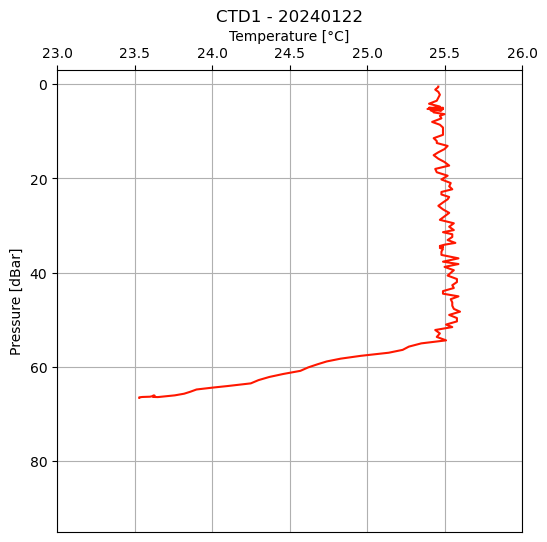

In [10]:
plt.figure(figsize=(6, 6))
plt.plot(CTD1_filtered['temperature 1 corrected'], CTD1_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD1 - 20240122')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(23, 26)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD1.png' ), bbox_inches='tight', dpi=150)

plt.show()

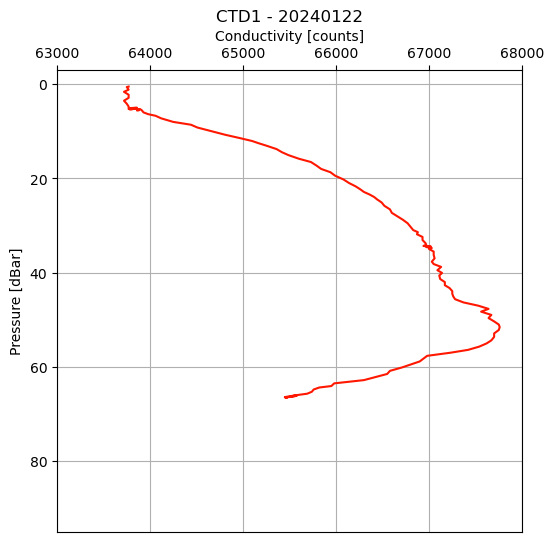

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(CTD1_filtered['conductivity'], CTD1_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD1 - 20240122')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(63000, 68000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD1.png' ), bbox_inches='tight', dpi=150)

plt.show()

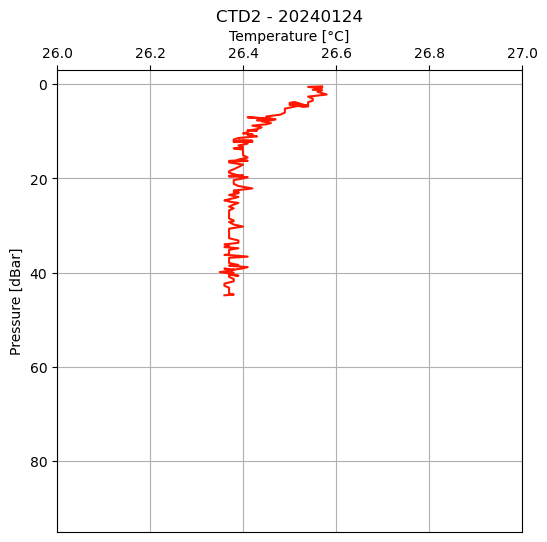

In [12]:
plt.figure(figsize=(6, 6))
plt.plot(CTD2_filtered['temperature 1 corrected'], CTD2_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD2 - 20240124')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(26, 27)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD2.png' ), bbox_inches='tight', dpi=150)

plt.show()

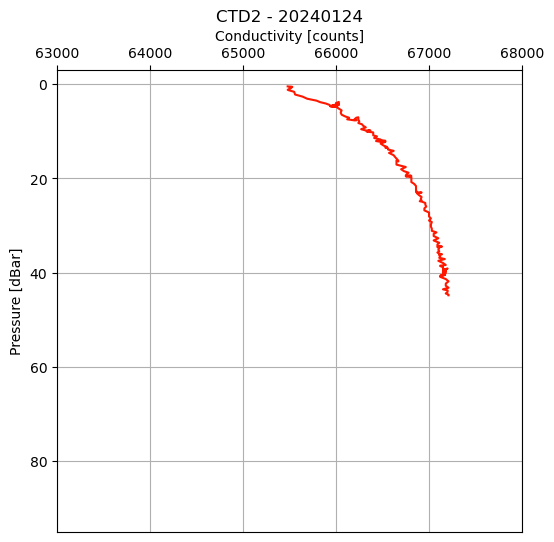

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(CTD2_filtered['conductivity'], CTD2_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD2 - 20240124')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(63000, 68000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD2.png' ), bbox_inches='tight', dpi=150)

plt.show()

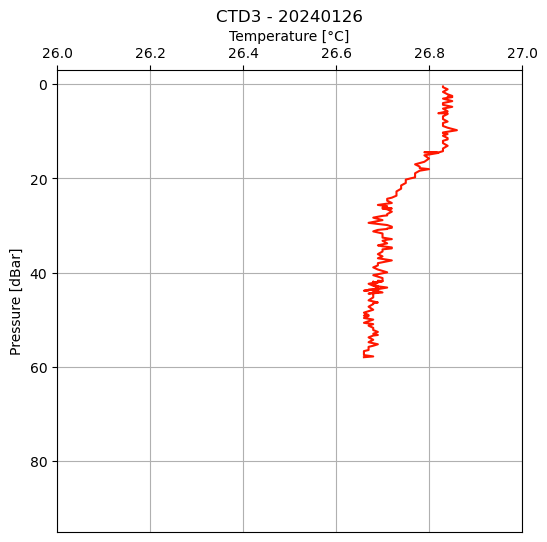

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(CTD3_filtered['temperature 1 corrected'], CTD3_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD3 - 20240126')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(26, 27)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD3.png' ), bbox_inches='tight', dpi=150)

plt.show()

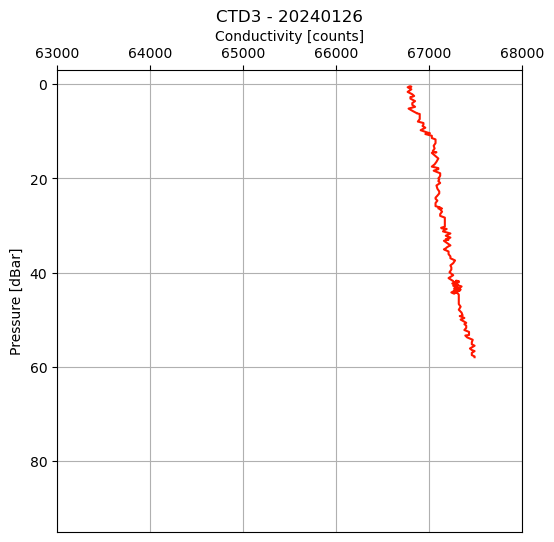

In [15]:
plt.figure(figsize=(6, 6))
plt.plot(CTD3_filtered['conductivity'], CTD3_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD3 - 20240126')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(63000, 68000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD3.png' ), bbox_inches='tight', dpi=150)

plt.show()

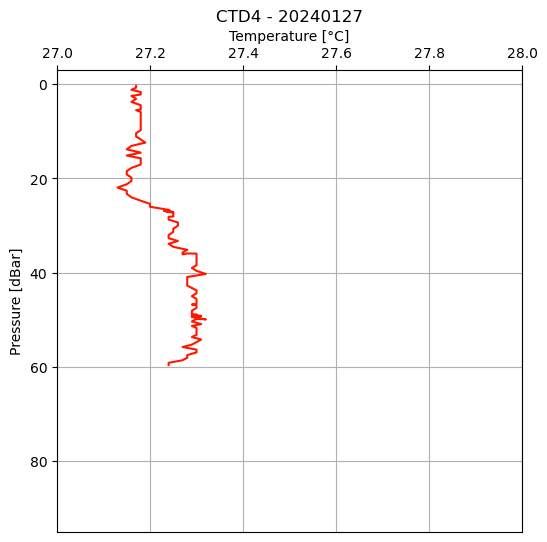

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(CTD4_filtered['temperature 1 corrected'], CTD4_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD4 - 20240127')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(27, 28)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD4.png' ), bbox_inches='tight', dpi=150)

plt.show()

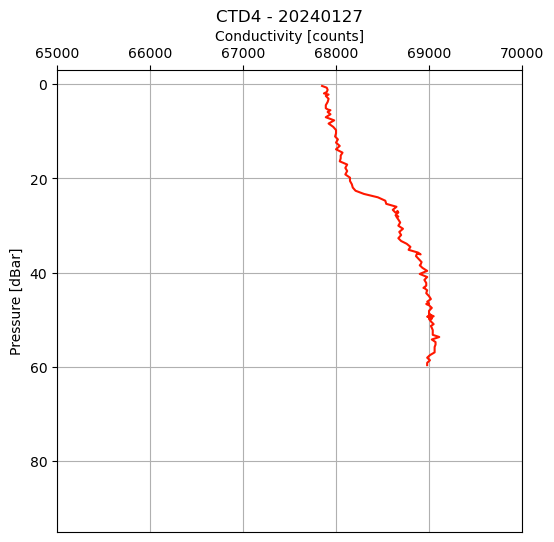

In [17]:
plt.figure(figsize=(6, 6))
plt.plot(CTD4_filtered['conductivity'], CTD4_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD4 - 20240127')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(65000, 70000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD4.png' ), bbox_inches='tight', dpi=150)

plt.show()

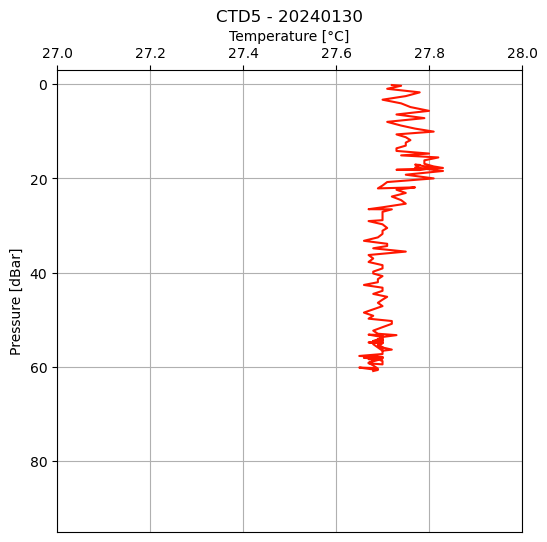

In [18]:
plt.figure(figsize=(6, 6))
plt.plot(CTD5_filtered['temperature 1 corrected'], CTD5_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD5 - 20240130')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(27, 28)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD5.png' ), bbox_inches='tight', dpi=150)

plt.show()

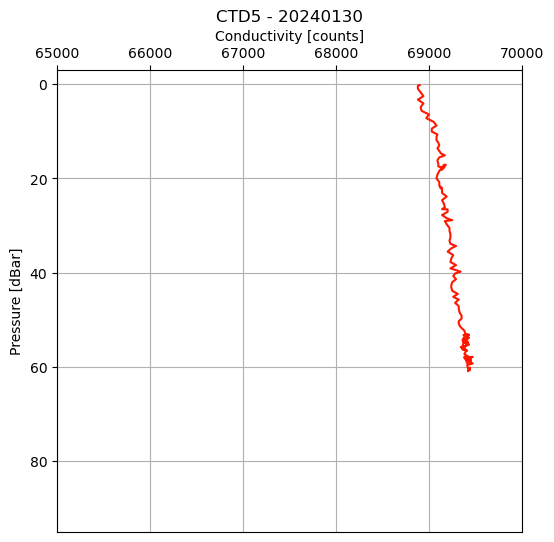

In [19]:
plt.figure(figsize=(6, 6))
plt.plot(CTD5_filtered['conductivity'], CTD5_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD5 - 20240130')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(65000, 70000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD5.png' ), bbox_inches='tight', dpi=150)

plt.show()

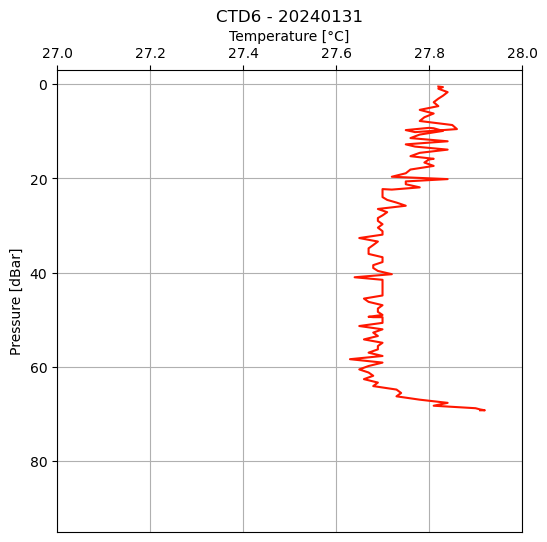

In [20]:
plt.figure(figsize=(6, 6))
plt.plot(CTD6_filtered['temperature 1 corrected'], CTD6_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD6 - 20240131')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(27, 28)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD6.png' ), bbox_inches='tight', dpi=150)

plt.show()

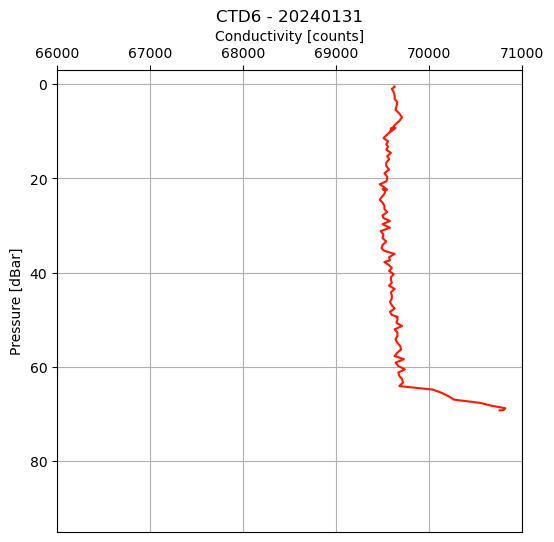

In [21]:
plt.figure(figsize=(6, 6))
plt.plot(CTD6_filtered['conductivity'], CTD6_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD6 - 20240131')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(66000, 71000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD6.png' ), bbox_inches='tight', dpi=150)

plt.show()

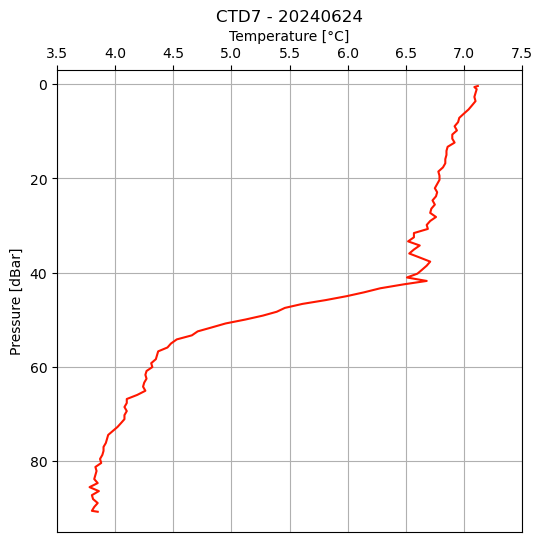

In [22]:
plt.figure(figsize=(6, 6))
plt.plot(CTD7_filtered['temperature 1 corrected'], CTD7_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD7 - 20240624')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(3.5, 7.5)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD7.png' ), bbox_inches='tight', dpi=150)

plt.show()

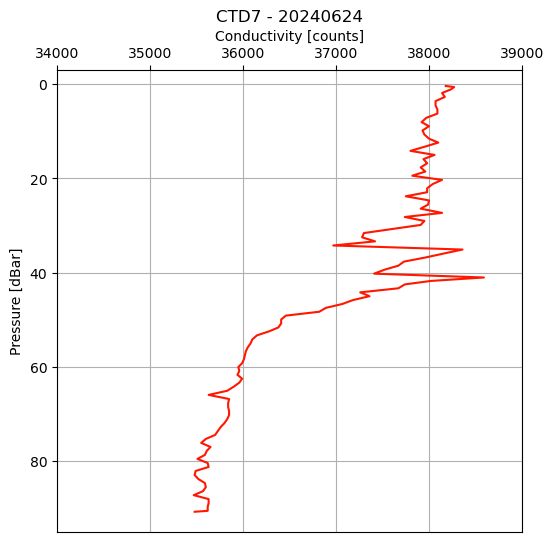

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(CTD7_filtered['conductivity'], CTD7_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD7 - 20240624')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(34000, 39000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD7.png' ), bbox_inches='tight', dpi=150)

plt.show()

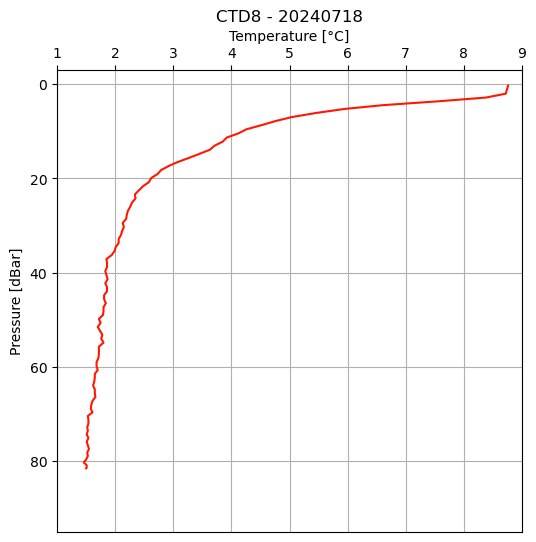

In [24]:
plt.figure(figsize=(6, 6))
plt.plot(CTD8_filtered['temperature 1 corrected'], CTD8_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD8 - 20240718')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(1, 9)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD8.png' ), bbox_inches='tight', dpi=150)

plt.show()

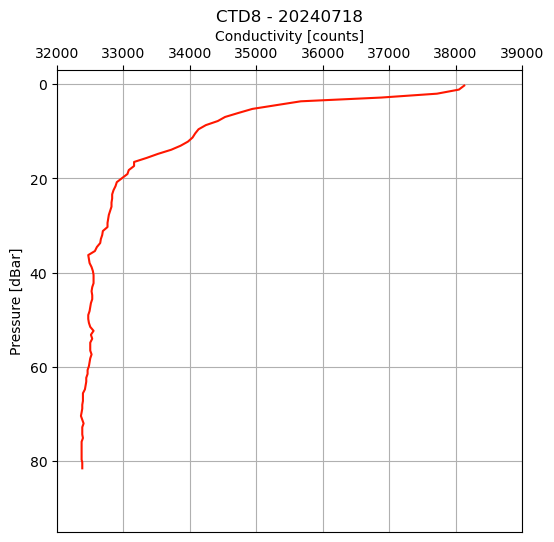

In [25]:
plt.figure(figsize=(6, 6))
plt.plot(CTD8_filtered['conductivity'], CTD8_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD8 - 20240718')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(32000, 39000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD8.png' ), bbox_inches='tight', dpi=150)

plt.show()

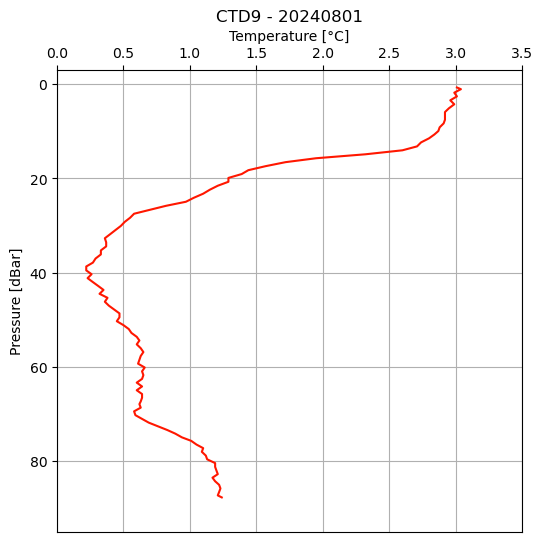

In [26]:
plt.figure(figsize=(6, 6))
plt.plot(CTD9_filtered['temperature 1 corrected'], CTD9_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD9 - 20240801')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(0, 3.5)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD9.png' ), bbox_inches='tight', dpi=150)

plt.show()

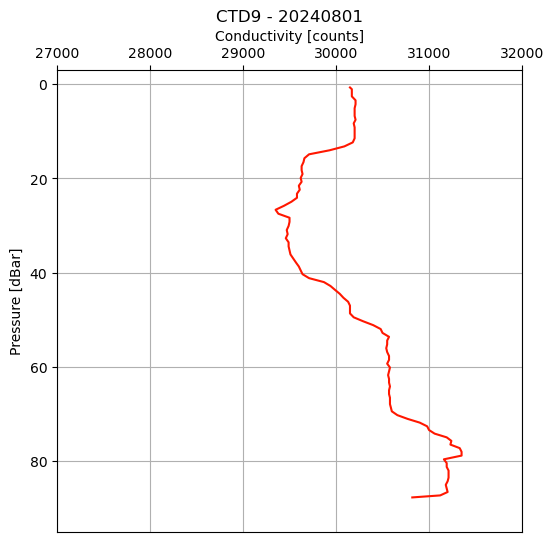

In [27]:
plt.figure(figsize=(6, 6))
plt.plot(CTD9_filtered['conductivity'], CTD9_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD9 - 20240801')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(27000, 32000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD9.png' ), bbox_inches='tight', dpi=150)

plt.show()

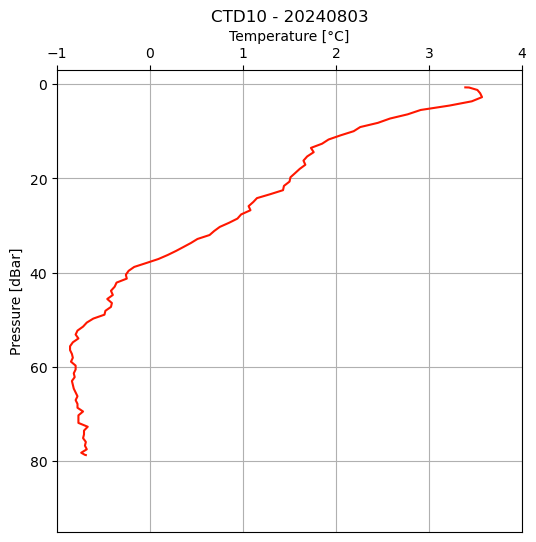

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(CTD10_filtered['temperature 1 corrected'], CTD10_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD10 - 20240803')
plt.xlabel('Temperature [°C]')
plt.ylabel('Pressure [dBar]')
plt.xlim(-1, 4)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
plt.savefig(os.path.join('Results', 'CTD10.png' ), bbox_inches='tight', dpi=150)

plt.show()

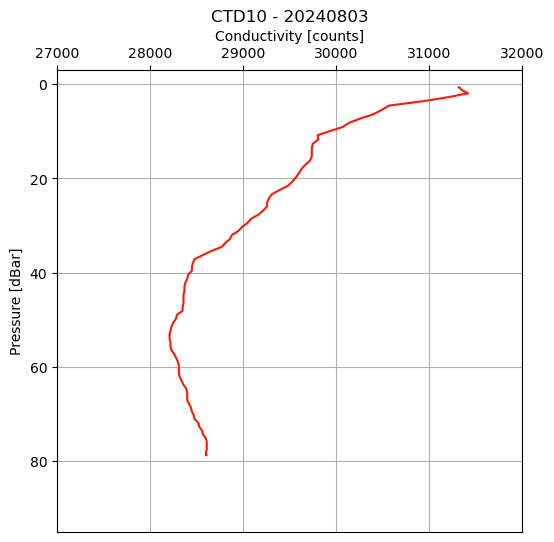

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(CTD10_filtered['conductivity'], CTD10_filtered['pressure'], color = '#ff1700', zorder = 2)

# Inversion of y-axis
plt.gca().invert_yaxis()

# Move x-axis to the top
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('CTD10 - 20240803')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Pressure [dBar]')
plt.xlim(27000, 32000)
plt.ylim(95, -3)
plt.grid(True)

# Export as an image
#plt.savefig(os.path.join('Results', 'CTD10.png' ), bbox_inches='tight', dpi=150)

plt.show()

### Salinity over temperature

C:\Users\lolap\AppData\Local\Temp\ipykernel_21024\1181996994.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


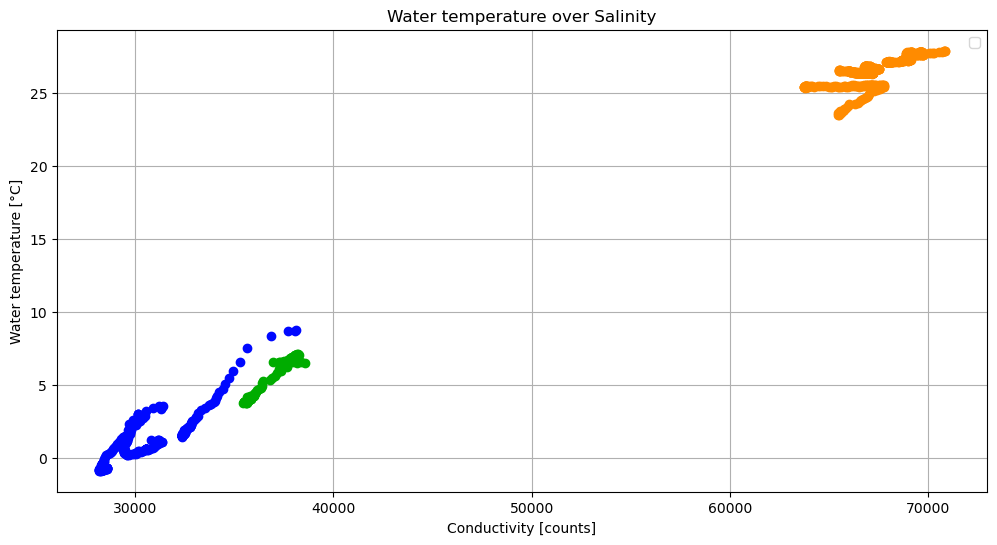

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(CTD1_filtered['conductivity'], CTD1_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD2_filtered['conductivity'], CTD2_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD3_filtered['conductivity'], CTD3_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD4_filtered['conductivity'], CTD4_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD5_filtered['conductivity'], CTD5_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD6_filtered['conductivity'], CTD6_filtered['temperature 1 corrected'], marker='o', color = '#ff8b00', zorder = 2)
plt.scatter(CTD7_filtered['conductivity'], CTD7_filtered['temperature 1 corrected'], marker='o', color = '#00ac00', zorder = 2)
plt.scatter(CTD8_filtered['conductivity'], CTD8_filtered['temperature 1 corrected'], marker='o', color = '#0008ff', zorder = 2)
plt.scatter(CTD9_filtered['conductivity'], CTD9_filtered['temperature 1 corrected'], marker='o', color = '#0008ff', zorder = 2)
plt.scatter(CTD10_filtered['conductivity'], CTD10_filtered['temperature 1 corrected'], marker='o', color = '#0008ff', zorder = 2)

plt.title('Water temperature over Salinity')
plt.xlabel('Conductivity [counts]')
plt.ylabel('Water temperature [°C]')
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
#plt.savefig(os.path.join('Results', 'Tw_VS_salinity.png' ), bbox_inches='tight', dpi=150)

plt.show()